In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("../data/covid-data.csv")

In [4]:
df.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,24/02/2020,5,5,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,25/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,26/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,27/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,28/02/2020,5,0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
df.shape

(5818, 67)

In [ ]:
for column in df.columns:
    if df[column].isnull().sum() == df.shape[0]:
        print(f"'{column}'____{df[column].isnull().sum()} / {df.shape[0]}")

**Loại bỏ hàng / cột**

`df.drop([column], axis=0)`

> - `axis=0`: loại bỏ hàng
> - `axis=1`: loại bỏ cột, tương đương với `axis=-1`

In [5]:
new_df = df.drop(['weekly_icu_admissions', 'weekly_icu_admissions_per_million'], axis=1)

In [6]:
new_df.shape

(5818, 65)

In [ ]:
df.dtypes

In [7]:
numeric_covid_data = df.select_dtypes(['int64', 'float64'])

In [8]:
numeric_covid_data.shape

(5818, 62)

In [9]:
numeric_covid_data.head()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,5,5,NaN,NaN,NaN,NaN,0.125,0.125,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,5,0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,5,0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,5,0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,5,0,NaN,NaN,NaN,NaN,0.125,0.000,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [10]:
numeric_columns = []
for column in numeric_covid_data.columns:
    if numeric_covid_data[column].isnull().sum() == 0:
        numeric_columns.append(column)
        print(f"'{column}'____{numeric_covid_data[column].isnull().sum()} / {numeric_covid_data.shape[0]}")

'total_cases'____0 / 5818
'new_cases'____0 / 5818
'total_cases_per_million'____0 / 5818
'new_cases_per_million'____0 / 5818
'population'____0 / 5818
'population_density'____0 / 5818
'median_age'____0 / 5818
'aged_65_older'____0 / 5818
'aged_70_older'____0 / 5818
'gdp_per_capita'____0 / 5818
'cardiovasc_death_rate'____0 / 5818
'diabetes_prevalence'____0 / 5818
'life_expectancy'____0 / 5818
'human_development_index'____0 / 5818


In [11]:
covid_data = numeric_covid_data[numeric_columns]
covid_data.head()

,total_cases,new_cases,total_cases_per_million,new_cases_per_million,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,cardiovasc_death_rate,diabetes_prevalence,life_expectancy,human_development_index
0,5,5,0.125,0.125,40099462,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511
1,5,0,0.125,0.000,40099462,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511
2,5,0,0.125,0.000,40099462,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511
3,5,0,0.125,0.000,40099462,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511
4,5,0,0.125,0.000,40099462,54.422,18.6,2.581,1.337,1803.987,597.029,9.59,64.83,0.511


In [12]:
covid_data.median()

total_cases                1.763050e+05
new_cases                  2.610000e+02
total_cases_per_million    4.494237e+03
new_cases_per_million      7.060000e+00
population                 2.592109e+07
population_density         2.504000e+01
median_age                 3.790000e+01
aged_65_older              1.550400e+01
aged_70_older              1.012900e+01
gdp_per_capita             4.058572e+04
cardiovasc_death_rate      1.535070e+02
diabetes_prevalence        5.070000e+00
life_expectancy            8.163000e+01
human_development_index    9.310000e-01
dtype: float64

In [13]:
covid_data.shape

(5818, 14)

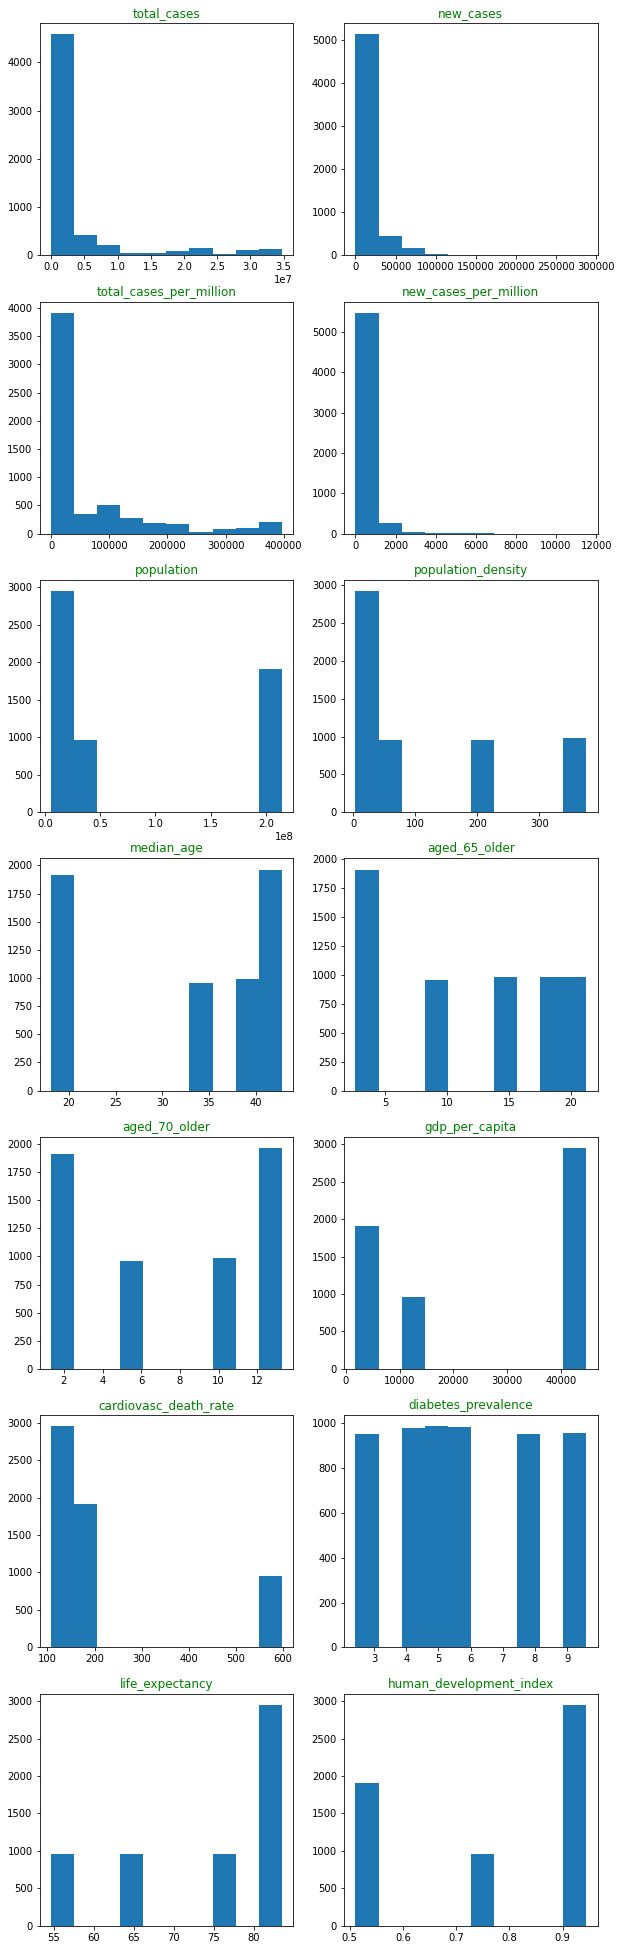

In [22]:
n_rows = 7
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 35))

for i in range(covid_data.shape[1]):
    row_idx, col_idx = i // n_cols, i % n_cols

    ax = axes[row_idx, col_idx]

    ax.hist(covid_data.iloc[:, i])
    ax.set_title(covid_data.columns[i], color='green')

plt.show()


In [24]:
covid_data['human_development_index'].value_counts()

0.944    987
0.938    983
0.931    980
0.511    958
0.765    955
0.539    955
Name: human_development_index, dtype: int64

In [25]:
non_duplicated_df = covid_data.drop_duplicates()

In [26]:
non_duplicated_df.shape

(5360, 14)

In [27]:
covid_data.shape

(5818, 14)

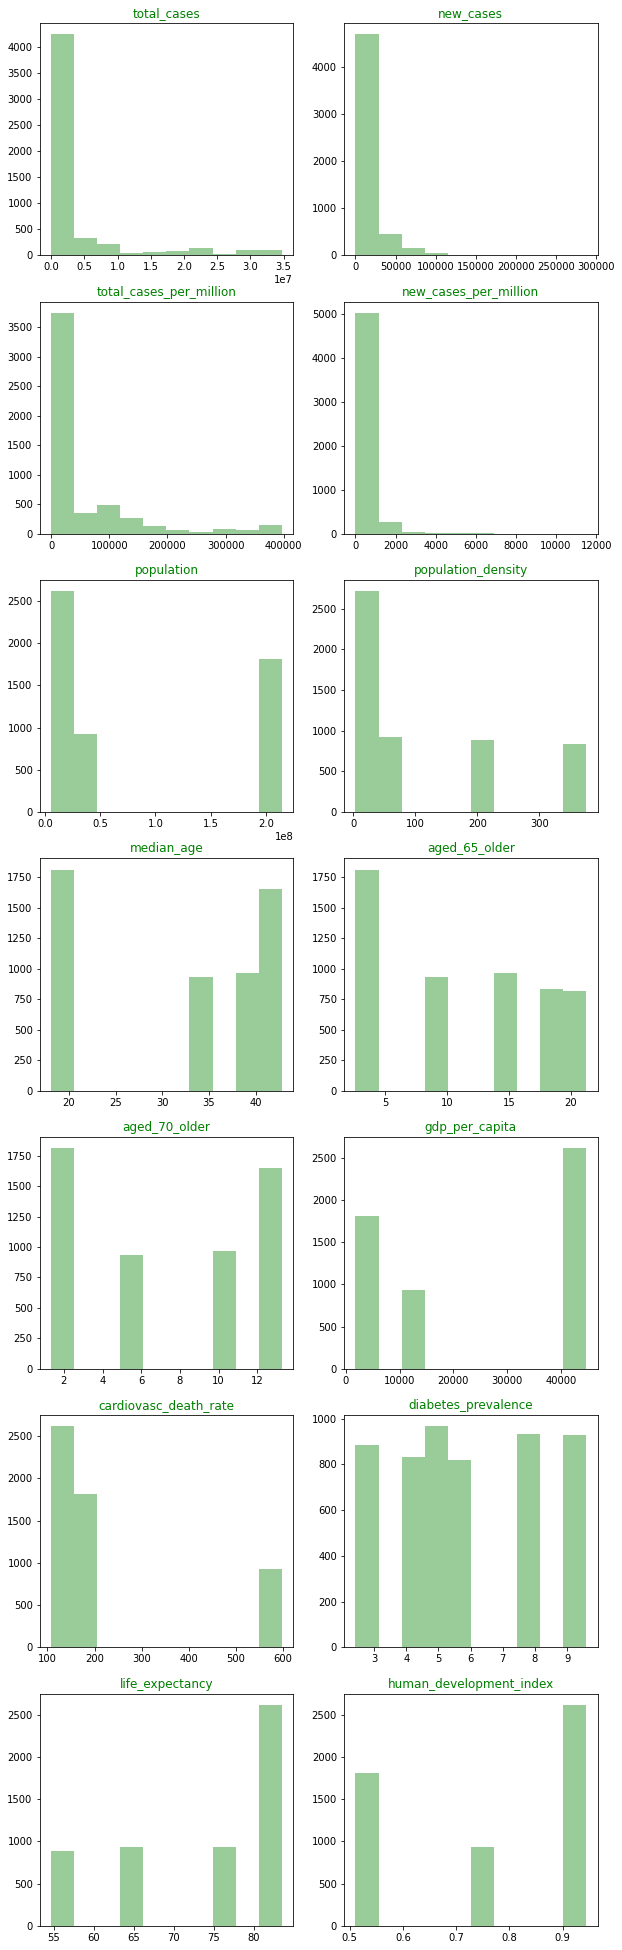

In [39]:
n_rows = 7
n_cols = 2

fig, axes = plt.subplots(n_rows, n_cols, figsize=(10, 35))

for i in range(non_duplicated_df.shape[1]):
    row_idx, col_idx = i // n_cols, i % n_cols

    ax = axes[row_idx, col_idx]

    ax.hist(non_duplicated_df.iloc[:, i], color='green', alpha=0.4)
    ax.set_title(non_duplicated_df.columns[i], color='green')

plt.show()